# Módulo 2 - Actividad 06 - Implementación de red neuronal en Keras



## Red neuronal para la predicción del peso

El objetivo de esta actividad es implementar una red neuronal (utilizando el API secuencial de Keras) que tendrá como objetivo estimar el peso de una persona a partir de mediciones que se tienen disponibles. Para esto, descargue el siguiente conjunto de datos:  bodyfat.csv Download bodyfat.csv.

Antes de iniciar con la construcción de la red neuronal, se te invita a explorar el conjunto de datos y realice el preprocesamiento requerido (en caso de ser necesario).  Adicionalmente, se sugiere evitar utilizar todas las características, por lo cual se espera que utilices alguna técnica para selección de características o reducción de dimensiones.

## Descripción del conjunto de datos

El conjunto de datos consiste de estimaciones del porcentaje de grasa corporal determinado por pesaje bajo el agua y varias mediciones de circunferencia corporal para 252 hombres. Cada ejemplo contiene la siguiente información:

* Densidad
* Porcentaje de grasa
* Edad (años)
* Peso (libras)
* Altura (pulgadas)
* Los siguiente datos son circunferencias medidas en centímetros.

* Cuello
* Pecho
* Abdomen
* Cadera
* Muslo
* Rodilla
* Tobillo
* Bíceps
* Antebrazo
* Muñeca

In [8]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error

data = pd.read_csv('bodyfat.csv')
data.head()

,Density,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
0,1.0708,12.3,23,154.25,67.75,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1
1,1.0853,6.1,22,173.25,72.25,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2
2,1.0414,25.3,22,154.00,66.25,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6
3,1.0751,10.4,26,184.75,72.25,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2
4,1.0340,28.7,24,184.25,71.25,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7


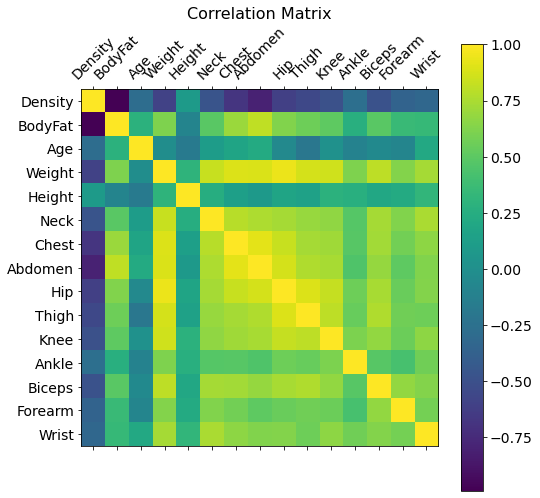

In [9]:
f = plt.figure(figsize=(8, 8))
plt.matshow(data.corr(), fignum=f.number)
plt.xticks(range(data.select_dtypes(['number']).shape[1]), data.select_dtypes(['number']).columns, fontsize=14, rotation=45)
plt.yticks(range(data.select_dtypes(['number']).shape[1]), data.select_dtypes(['number']).columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);

Vamos a seleccionar `'BodyFat','Neck','Chest','Abdomen','Hip','Thigh','Knee','Biceps', 'Forearm'` ya que son las que más tienen correlación con nuestra variable a predecir.

In [10]:
# Selecciona las características basandose en el heatmap
X = data[['BodyFat','Neck','Chest','Abdomen','Hip','Thigh','Knee','Biceps', 'Forearm']]
y = data['Weight']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = keras.Sequential([
    layers.Input(shape=(9,)),
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    # layers.Dense(16, activation='sigmoid'),
    layers.Dense(1)  # Capa de salida con una sola neurona para predecir el peso
])

model.compile(optimizer='adam', loss='mean_squared_error')

Solo se escalan las características de entrada X, no la variable de salida y, porque en problemas de regresión como este, no es necesario escalar la variable de salida. El objetivo es predecir el peso, que tiene una escala natural en el contexto del problema.

In [11]:
model.fit(X_train_scaled, y_train, epochs=500, batch_size=32, validation_split=0.2)

Epoch 1/500
5/5 [==============================] - 1s 64ms/step - loss: 31766.7148 - val_loss: 34953.3477
Epoch 2/500
5/5 [==============================] - 0s 15ms/step - loss: 31641.3125 - val_loss: 34820.6602
Epoch 3/500
5/5 [==============================] - 0s 15ms/step - loss: 31515.1875 - val_loss: 34683.3828
Epoch 4/500
5/5 [==============================] - 0s 14ms/step - loss: 31386.8008 - val_loss: 34530.6406
Epoch 5/500
5/5 [==============================] - 0s 14ms/step - loss: 31239.9336 - val_loss: 34363.0938
Epoch 6/500
5/5 [==============================] - 0s 16ms/step - loss: 31074.1562 - val_loss: 34169.2578
Epoch 7/500
5/5 [==============================] - 0s 15ms/step - loss: 30880.6992 - val_loss: 33948.9648
Epoch 8/500
5/5 [==============================] - 0s 15ms/step - loss: 30664.8848 - val_loss: 33695.1484
Epoch 9/500
5/5 [==============================] - 0s 14ms/step - loss: 30413.9688 - val_loss: 33403.0352
Epoch 10/500
5/5 [============================

5/5 [==============================] - 0s 15ms/step - loss: 218.9266 - val_loss: 274.7337
Epoch 157/500
5/5 [==============================] - 0s 15ms/step - loss: 214.3241 - val_loss: 268.7386
Epoch 158/500
5/5 [==============================] - 0s 15ms/step - loss: 209.5974 - val_loss: 261.5446
Epoch 159/500
5/5 [==============================] - 0s 14ms/step - loss: 205.1053 - val_loss: 256.5370
Epoch 160/500
5/5 [==============================] - 0s 11ms/step - loss: 200.9980 - val_loss: 250.9469
Epoch 161/500
5/5 [==============================] - 0s 14ms/step - loss: 196.7610 - val_loss: 241.9285
Epoch 162/500
5/5 [==============================] - 0s 13ms/step - loss: 192.8154 - val_loss: 236.0178
Epoch 163/500
5/5 [==============================] - 0s 13ms/step - loss: 188.8912 - val_loss: 228.8181
Epoch 164/500
5/5 [==============================] - 0s 14ms/step - loss: 184.8856 - val_loss: 224.0726
Epoch 165/500
5/5 [==============================] - 0s 15ms/step - loss: 181.

5/5 [==============================] - 0s 18ms/step - loss: 46.9594 - val_loss: 51.3005
Epoch 316/500
5/5 [==============================] - 0s 16ms/step - loss: 47.1421 - val_loss: 51.0246
Epoch 317/500
5/5 [==============================] - 0s 16ms/step - loss: 46.5928 - val_loss: 51.6375
Epoch 318/500
5/5 [==============================] - 0s 16ms/step - loss: 46.4622 - val_loss: 51.9351
Epoch 319/500
5/5 [==============================] - 0s 16ms/step - loss: 46.2902 - val_loss: 51.6173
Epoch 320/500
5/5 [==============================] - 0s 15ms/step - loss: 46.0294 - val_loss: 51.4693
Epoch 321/500
5/5 [==============================] - 0s 15ms/step - loss: 45.8435 - val_loss: 51.0176
Epoch 322/500
5/5 [==============================] - 0s 17ms/step - loss: 45.5483 - val_loss: 50.3781
Epoch 323/500
5/5 [==============================] - 0s 21ms/step - loss: 45.4824 - val_loss: 50.1713
Epoch 324/500
5/5 [==============================] - 0s 18ms/step - loss: 45.3112 - val_loss: 50

5/5 [==============================] - 0s 15ms/step - loss: 30.6558 - val_loss: 45.2144
Epoch 476/500
5/5 [==============================] - 0s 16ms/step - loss: 30.5814 - val_loss: 45.4071
Epoch 477/500
5/5 [==============================] - 0s 15ms/step - loss: 30.5120 - val_loss: 45.6031
Epoch 478/500
5/5 [==============================] - 0s 14ms/step - loss: 30.6429 - val_loss: 45.0634
Epoch 479/500
5/5 [==============================] - 0s 16ms/step - loss: 30.4872 - val_loss: 45.0985
Epoch 480/500
5/5 [==============================] - 0s 15ms/step - loss: 30.5787 - val_loss: 45.1882
Epoch 481/500
5/5 [==============================] - 0s 16ms/step - loss: 30.7296 - val_loss: 45.8006
Epoch 482/500
5/5 [==============================] - 0s 18ms/step - loss: 30.5076 - val_loss: 45.4684
Epoch 483/500
5/5 [==============================] - 0s 16ms/step - loss: 30.2623 - val_loss: 45.1997
Epoch 484/500
5/5 [==============================] - 0s 18ms/step - loss: 30.2146 - val_loss: 44

In [12]:
loss = model.evaluate(X_test_scaled, y_test)
print(f'Pérdida en el conjunto de prueba: {loss}')

2/2 [==============================] - 0s 0s/step - loss: 35.1017
Pérdida en el conjunto de prueba: 35.101715087890625


In [13]:
predictions = model.predict(X_test_scaled)
predictions_df = pd.DataFrame(data=X_test, columns=['BodyFat','Neck','Chest','Abdomen','Hip','Thigh','Knee','Biceps', 'Forearm'])

# Agregar las predicciones y peso real
predictions_df['y_pred'] = predictions
predictions_df['y_real'] = y_test.values
predictions_df.head(10)

2/2 [==============================] - 0s 10ms/step


,BodyFat,Neck,Chest,Abdomen,Hip,Thigh,Knee,Biceps,Forearm,y_pred,y_real
165,19.2,40.5,107.5,95.1,104.5,64.8,41.3,36.4,33.7,210.212555,217.00
6,19.2,36.4,105.1,90.7,100.3,58.4,38.3,31.9,27.8,177.098419,181.00
111,28.0,37.1,108.0,105.0,103.0,63.7,40.0,33.5,27.8,191.005630,183.25
172,20.5,38.4,100.5,90.3,98.7,57.8,37.3,31.0,28.7,171.440689,177.25
115,16.7,36.3,97.0,86.6,92.6,55.9,36.3,29.8,26.3,149.955811,158.00
183,12.1,35.3,92.3,86.8,96.1,58.0,39.4,30.0,26.4,160.111465,159.25
199,23.6,37.4,103.7,89.7,94.2,58.5,39.0,33.8,28.8,169.743332,170.75
235,18.6,38.3,104.7,95.6,93.7,54.4,37.1,30.3,26.3,164.213699,168.75
9,11.7,42.1,99.6,88.6,104.1,63.1,41.7,35.6,30.0,201.298508,198.25
30,11.9,38.7,100.5,88.7,99.8,57.5,38.7,32.5,27.7,176.392624,182.00


In [14]:
y_pred = model.predict(X_test_scaled)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f'Error Absoluto Medio (MAE): {mae}')
print(f'Error Cuadrático Medio (MSE): {mse}')

2/2 [==============================] - 0s 0s/step
Error Absoluto Medio (MAE): 4.932038071576287
Error Cuadrático Medio (MSE): 35.10170403771796


In [16]:
model.save('C:/Users/09090/Documents/ML/MODELO')

INFO:tensorflow:Assets written to: C:/Users/09090/Documents/ML/MODELO\assets


In [17]:
from pickle import dump

dump(scaler, open('scaler.pkl', 'wb'))